# News, Trust, and Data Access

## Analysis

Here we will examine the dataset to attempt to answer the following questions:

1. Are there any statistically significant differences between demographic groups with regard to trusting online news reporting?
2. What news outlets are most trusted? And by whom?

### Setup

The following cells import and organize the dataset into a pandas DataFrame.

In [25]:
# Setup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Set plt style
plt.style.use('seaborn')

# Import the dataset from the cleaned csv file
survey_tidy = pd.read_csv('dataset/news_trust_data__clean.csv')

# Create a shorter DataFrame without the NewsSource and Source Trust columns (i.e. no duplicate RespondentID entries for different NewsSources)
survey_short = survey_tidy[survey_tidy['NewsSource'] == 'NYT'].drop(columns=['NewsSource', 'SourceTrust'])

# Check shape and head of datasets
print(survey_short.shape)
survey_short.head()

(1019, 9)


,RespondentID,Political_View,General_Trust,Pay_For_News,Data_Access,Trump_Approval,Age,Gender,Income
0,6176264298,Moderate,Fair Amount,No,No change,Strongly disapprove,30-44,Male,"10,000-24,999"
1,6176263960,Moderate,Fair Amount,No,Increase Trust,Somewhat disapprove,18-29,Female,"0-9,999"
2,6176258621,Liberal,Fair Amount,Yes,Increase Trust,Strongly disapprove,30-44,Male,"125,000-149,999"
3,6176257082,Liberal,Fair Amount,No,Increase Trust,Strongly disapprove,18-29,Male,"125,000-149,999"
4,6176256111,Liberal,Fair Amount,Yes,No change,Strongly disapprove,30-44,Male,"10,000-24,999"


In [26]:
# Check the tidy dataset
print(survey_tidy.shape)
survey_tidy.head()

(11209, 11)


,RespondentID,Political_View,General_Trust,Pay_For_News,Data_Access,Trump_Approval,Age,Gender,Income,NewsSource,SourceTrust
0,6176264298,Moderate,Fair Amount,No,No change,Strongly disapprove,30-44,Male,"10,000-24,999",NYT,1
1,6176263960,Moderate,Fair Amount,No,Increase Trust,Somewhat disapprove,18-29,Female,"0-9,999",NYT,1
2,6176258621,Liberal,Fair Amount,Yes,Increase Trust,Strongly disapprove,30-44,Male,"125,000-149,999",NYT,1
3,6176257082,Liberal,Fair Amount,No,Increase Trust,Strongly disapprove,18-29,Male,"125,000-149,999",NYT,0
4,6176256111,Liberal,Fair Amount,Yes,No change,Strongly disapprove,30-44,Male,"10,000-24,999",NYT,1


In [27]:
# Preferred order of categories
order = {}
order['Data_Access'] = ['Decrease Trust', 'No change', 'Increase Trust']
order['General_Trust'] = ['None at all', 'Not very much', 'Fair Amount', 'Great Amount']
order['Income'] = ['0-9,999', '10,000-24,999', '25,000-49,999', '50,000-74,999', '75,000-99,999', '100,000-124,999', '125,000-149,999', '150,000-174,999', '175,000-199,999', '200,000+', 'Prefer not to answer']
order['Trump_Approval'] = ['Strongly disapprove', 'Somewhat disapprove', 'Somewhat approve', 'Strongly approve']
order['Political_View'] = ['Very Liberal', 'Liberal', 'Moderate', 'Conservative', 'Very Conservative']

# Set order for specified categories
for c in order.keys():
    survey_short[c] = pd.Categorical(survey_short[c], order[c])
    survey_tidy[c] = pd.Categorical(survey_tidy[c], order[c])

## How does trust of the press differ between various demographics?

First, we will look at the overall survey results of trust in online news reporting.

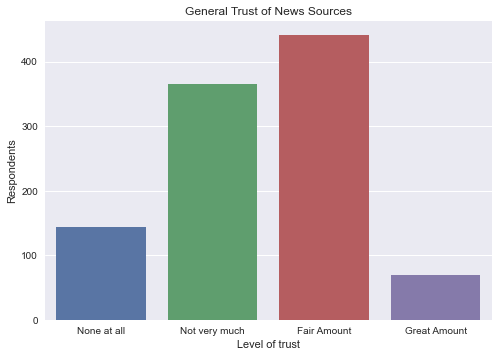

In [28]:
# Plot the LoT across all survey respondants
tot_trust = sns.countplot(x='General_Trust', data=survey_short)
tot_trust.set(title='General Trust of News Sources', xlabel='Level of trust', ylabel='Respondents');
tot_trust;

Now that we have a general baseline of the survey results, we will look for statistically significant correlations at the $\alpha = 0.05$ significance level between General_Trust and various demographics by running Chi-Squared tests for each of the following groups:
* Age
* Gender
* Income
* Political viewpoint
* Pays for news source

In [29]:
# Generate and print pvalues for each wanted feature
for f in ['Age', 'Gender', 'Pay_For_News', 'Income', 'Political_View']:
    chi, p_val, dof, exp = chi2_contingency(pd.crosstab(survey_short['General_Trust'], survey_short[f]))
    print('Feature:', f)
    print('Pvalue:', p_val, '\n')

Feature: Age
Pvalue: 0.2613333914938698 

Feature: Gender
Pvalue: 0.008260306704134248 

Feature: Pay_For_News
Pvalue: 0.00032122508705169996 

Feature: Income
Pvalue: 0.3946263029650509 

Feature: Political_View
Pvalue: 2.431723330036876e-23 



Our tests have found that the features of gender, political leaning, and paying for a news source all have statistically significant relationships to general trust in the press. The features of Age and Income can be safely ignored for this specific line of inquiry.

Lets start looking deeper by examining the relationship between reporting trust and gender.

#### Gender and Trust

Gender Breakdown:
Female    0.562316
Male      0.437684
Name: Gender, dtype: float64


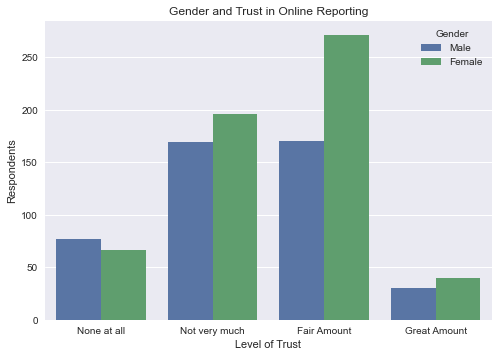

In [49]:
# How gender affects trust
print('Gender Breakdown:')
print(survey_short['Gender'].value_counts(normalize=True))

gender_trust_heat = sns.countplot(x='General_Trust', hue='Gender', data=survey_short);
gender_trust_heat.set(title='Gender and Trust in Online Reporting', xlabel='Level of Trust', ylabel='Respondents')
gender_trust_heat;

From the above bar graph, it appears that women are more trusting of online news reporting in general. As opposed to men, who are more likely to have no trust at all.

#### Paying for News and Trust

No     0.798822
Yes    0.201178
Name: Pay_For_News, dtype: float64


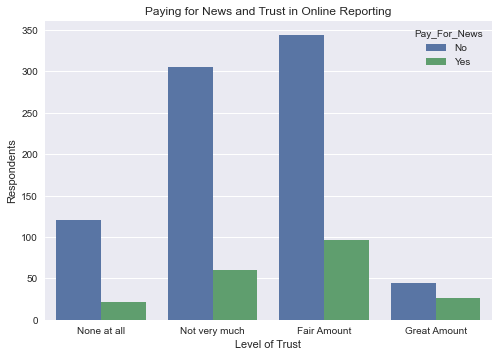

In [31]:
# How paying for a news source affects trust
print(survey_short['Pay_For_News'].value_counts(normalize=True))

pay_trust_heat = sns.countplot(x='General_Trust', hue='Pay_For_News', data=survey_short)
pay_trust_heat.set(title='Paying for News and Trust in Online Reporting', xlabel='Level of Trust', ylabel='Respondents')
pay_trust_heat;

Those who pay for news are more likely to have a Fair Amount of trust, and much more likely to have a Great Amount of trust, in online news reporting.

#### Political View and Trust

Very Liberal         0.107949
Liberal              0.215898
Moderate             0.411187
Conservative         0.210991
Very Conservative    0.053974
Name: Political_View, dtype: float64


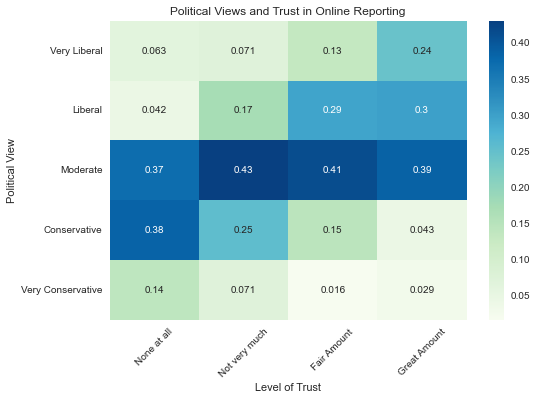

In [32]:
# Breakdown each political leaning by LoT (shading denotes % of political faction with given LoT)
print(survey_short['Political_View'].value_counts(normalize=True).sort_index())

pol_trust_heat = sns.heatmap(pd.crosstab(survey_short['Political_View'], survey_short['General_Trust'], normalize='columns'), cmap='GnBu', annot=True)
pol_trust_heat.set(title='Political Views and Trust in Online Reporting', xlabel='Level of Trust', ylabel='Political View')
plt.xticks(rotation=45)
pol_trust_heat;

After breaking down the data by political views, we can see that there is a trend of increasing trust as we moves from the right to left of the political spectrum. Those who reported a 'Fair Amount' of trust were disproportionately Liberal or Very Liberal, and an even greater discrepancy among those with a 'Great Amount' of trust. Looking at the 'Not very much' and 'None at all' levels of trust, we see a very similiar pattern in the opposite direction (disproportionately Conservative or Very Conservative).

Of all those surveyed that reported a 'Great Amount' of trust in online news reporting, 54% self identified as being on the left side of the political spectrum (30% Liberal, 24% Very Liberal). Compared to 39% identifying as moderates and less than 8% as right of center. For context, only 32% of all respondents identified as being left leaning, 41% as moderate, and 26% as right leaning.

## Individual News Sources

For our second line of inquiry, we will be examining how those surveyed trust 11 specific online news outlets.

Let us again start with a general overview of trust in each outlet.

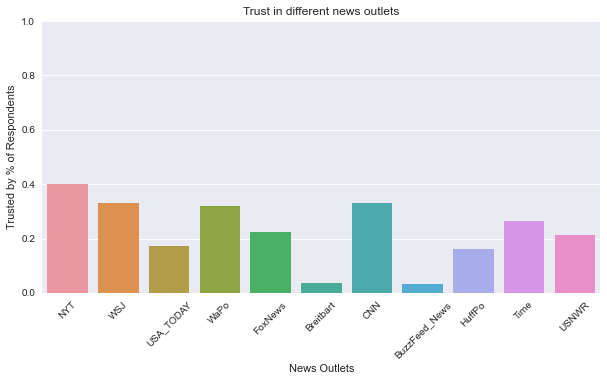

In [65]:
# Trust in individual news sources
plt.figure(figsize=(10,5))
plt.ylim((0, 1))
plt.xticks(rotation=45)
src_plot = sns.barplot(x=survey_tidy['NewsSource'], y=survey_tidy['SourceTrust'], ci=None)
src_plot.set(title='Trust in different news outlets', xlabel='News Outlets', ylabel='Trusted by % of Respondents')
src_plot;

In [34]:
# Percentages sorted by most trusted
src_cross = pd.crosstab(survey_tidy['NewsSource'], survey_tidy['SourceTrust'], normalize='index')[1].sort_values(ascending=False)
print(src_cross)

NewsSource
NYT              0.400393
CNN              0.329735
WSJ              0.329735
WaPo             0.317959
Time             0.264966
FoxNews          0.224730
USNWR            0.212954
USA_TODAY        0.173700
HuffPo           0.162905
Breitbart        0.037291
BuzzFeed_News    0.034347
Name: 1, dtype: float64


We see that no outlet is trusted by a majority of those surveyed. In fact, the most trusted online news outlet according to our data is the New York Times, at 40%. Four of the top five most trusted outlets are long standing traditional news outlets that had been in print for decades prior to their online presense (NYT, WSJ, Washington Post, Time). The fifth being the oldest 24/7 cable news network (CNN) at \#2.

On the bottom end of the list are Breitbart and BuzzFeed News, each with less than 4% of respondents indicating trust in their reporting. This is nearly 13 percentage points less than the next least trusted source, the Huffington Post.


In [35]:
# Generate and print pvalues for each wanted feature
for f in ['Age', 'Gender', 'Pay_For_News', 'Income', 'Political_View', 'General_Trust']:
    chi, p_val, dof, exp = chi2_contingency(pd.crosstab(survey_tidy[survey_tidy['SourceTrust'] == 1]['NewsSource'], survey_tidy[f]))
    print('Feature:', f)
    print('Pvalue:', p_val, '\n')

Feature: Age
Pvalue: 0.0002928239299239821 

Feature: Gender
Pvalue: 2.3630307848698984e-08 

Feature: Pay_For_News
Pvalue: 9.095319193475145e-06 

Feature: Income
Pvalue: 0.5672349719812468 

Feature: Political_View
Pvalue: 9.262265913904362e-98 

Feature: General_Trust
Pvalue: 2.0156779896046927e-61 



Age, gender, political view, paying for news, and general trust level have shown statistically significant associations at the $\alpha = 0.05$ level.

#### Age and New Sources

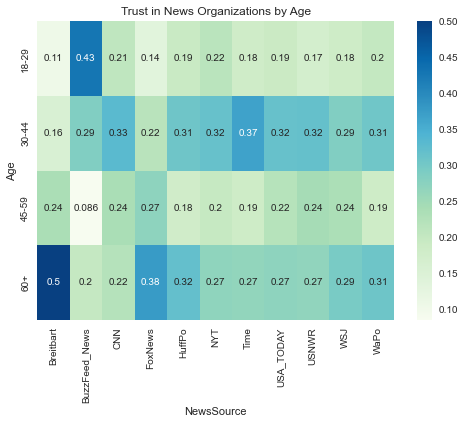

In [60]:
age_src_cross = pd.crosstab(survey_tidy['Age'], survey_tidy[survey_tidy['SourceTrust'] == 1]['NewsSource'], normalize='columns')
plt.title('Trust in News Organizations by Age')
sns.heatmap(age_src_cross, cmap='GnBu', annot=True);

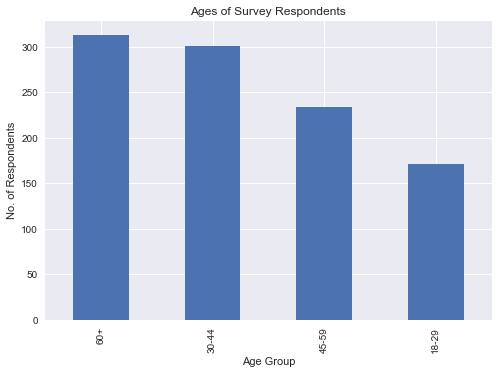

In [57]:
# Show breakdown of ages across all respondents
plt.title("Ages of Survey Respondents")
plt.xlabel("Age Group")
plt.ylabel("No. of Respondents")
survey_short['Age'].value_counts().plot(kind='bar');

While the vast majority of online news outlets readerships follow our survey's age breakdown, we see that Brietbart (and to a lesser extent, Fox News) is heavily skewed towards the older age groups. Half of those who indicated a trust in Brietbart's reporting are 60+, and another 24% in the 45-59 age group. Fox News follows a similiar, but less dramatic, skew towards the older groups.

Conversely, 43% of those who trust Buzzfeed News are in the youngest age group, and 72% being under the age of 45.

#### Gender and New Sources

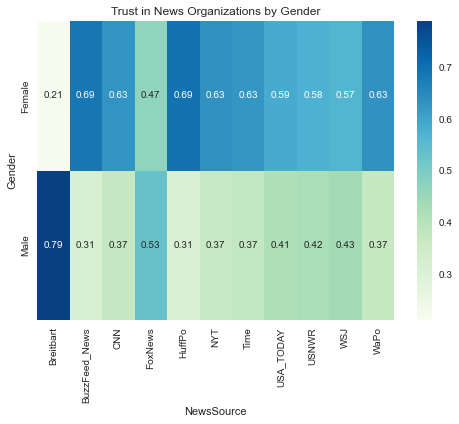

In [56]:
gender_src_cross = pd.crosstab(survey_tidy['Gender'], survey_tidy[survey_tidy['SourceTrust'] == 1]['NewsSource'], normalize='columns')
plt.title("Trust in News Organizations by Gender")
sns.heatmap(gender_src_cross, cmap='GnBu', annot=True);

In [39]:
print(survey_short['Gender'].value_counts(normalize=True))

Female    0.562316
Male      0.437684
Name: Gender, dtype: float64


When broken down by gender, we will notice the same two outlets (Breitbart and Fox News) sticking out from the crowd.

The 9 other outlets roughly follow the sample gender breakdown (56% women to 44% men), whereas those trusting Breitbart and Fox News are overwhelmingly male.

In the case of Breitbart, nearly 4 men reported trust in their reporting for every 1 woman who also did so.

#### Political Views and News Source

Very Liberal         0.107949
Liberal              0.215898
Moderate             0.411187
Conservative         0.210991
Very Conservative    0.053974
Name: Political_View, dtype: float64


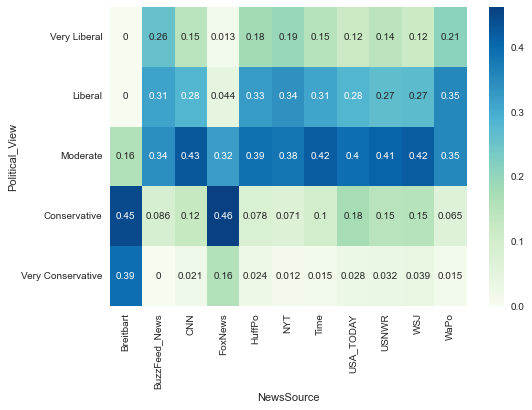

In [40]:
print(survey_short['Political_View'].value_counts(normalize=True).sort_index())

pol_src_cross = pd.crosstab(survey_tidy['Political_View'], survey_tidy[survey_tidy['SourceTrust'] == 1]['NewsSource'], normalize='columns')
sns.heatmap(pol_src_cross, cmap='GnBu', annot=True);

Breitbart and Fox News are again showing very different breakdowns than the sample breakdown of political views.

Those who trust Breitbart are tending to be overwhelmingly older (45+), male, and right of center. Those who trust Fox News follow the same pattern, but to a lesser extent.

The opposite is again true for Buzzfeed News, with over 90% of those reporting trust in their reporting identifying as moderate or left of center.

#### General Level of Trust and Individual News Sources

None at all      0.140334
Not very much    0.358194
Fair Amount      0.432777
Great Amount     0.068695
Name: General_Trust, dtype: float64


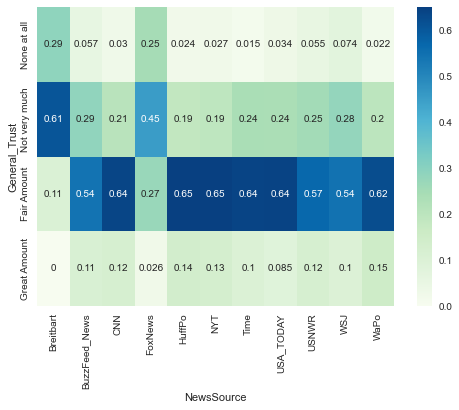

In [41]:
print(survey_short['General_Trust'].value_counts(normalize=True).sort_index())

gen_src_cross = pd.crosstab(survey_tidy['General_Trust'], survey_tidy[survey_tidy['SourceTrust'] == 1]['NewsSource'], normalize='columns')
sns.heatmap(gen_src_cross, cmap='GnBu', annot=True);

From these breakdowns by four different demographics, we are seeing a pattern of Breitbart and Fox News breaking the mold of the sample demographics and that of the other online news outlets.

Those who trust Breitbart and/or Fox News are disproportionately older (45+), male, right of center, and more distrustful of the news than we would expect from the sample.

### A closer look at the demographics

Lets look closer at how some of these demographics intersect (or don't).

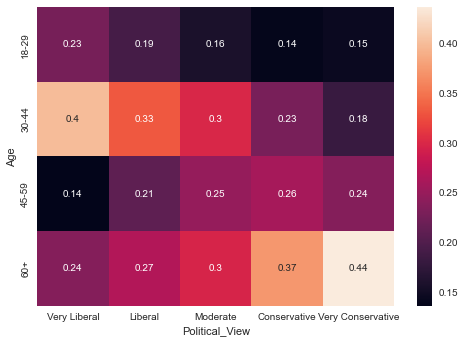

In [42]:
sns.heatmap(pd.crosstab(survey_short['Age'], survey_short['Political_View'], normalize='columns'), annot=True);

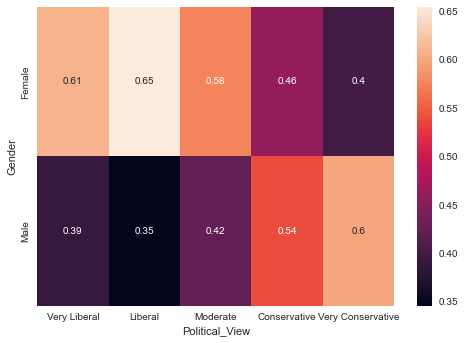

In [43]:
sns.heatmap(pd.crosstab(survey_short['Gender'], survey_short['Political_View'], normalize='columns'), annot=True);

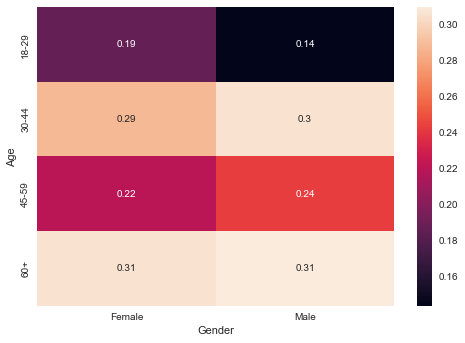

In [44]:
sns.heatmap(pd.crosstab(survey_short['Age'], survey_short['Gender'], normalize='columns'), annot=True);

From the heatmaps above, we see an intersection of our demographics disproportionately represented among those trusting Breitbart and Fox News. Among the people surveyed, those who are are Conservative or Very Conservative tend to be older men.

This particular group is the most likely to trust the online reporting of Breitbart and/or Fox News.

#### Intersection of trust between different news outlets

In [45]:
survey_pivot = survey_tidy.pivot(index='RespondentID', columns='NewsSource', values='SourceTrust')
print(survey_pivot.value_counts())

pd.concat([survey_pivot.sum(axis=1).value_counts(), survey_pivot.sum(axis=1).value_counts(normalize=True)], axis=1).sort_index()

Breitbart  BuzzFeed_News  CNN  FoxNews  HuffPo  NYT  Time  USA_TODAY  USNWR  WSJ  WaPo
0          0              0    0        0       0    0     0          0      0    0       179
                               1        0       0    0     0          0      0    0        87
                          1    0        0       0    0     0          0      0    0        41
                          0    0        0       1    0     0          0      0    1        28
                                                0    0     0          0      1    0        28
                                                                                         ... 
                          1    0        0       1    0     1          1      0    0         1
                                                                      0      1    1         1
                          0    0        0       1    1     1          1      0    0         1
                          1    0        0       1    0     1       

,0,1
0,179,0.175662
1,238,0.233562
2,200,0.196271
3,123,0.120707
4,95,0.093229
5,68,0.066732
6,51,0.050049
7,30,0.029441
8,26,0.025515
9,7,0.006869


- Over 17% of respondents reported no trust in any of the listed individual online news outlets.
- 23% reported trust in only a single source
- Over 70% trust no more than 3 online news outlets.

In [46]:
# What is the overlap between those who trust Breitbart and Fox News'
pd.crosstab(survey_pivot['Breitbart'], survey_pivot['FoxNews'], margins=True)

FoxNews,0,1,All
Breitbart,,,
0,784,197,981
1,6,32,38
All,790,229,1019


- Fox News is trusted by more than 5 times as many people as Breitbart
- Only 14% of those who trust Fox News also trust Breitbart
- Nearly 85% of those who trust Breitbart also trust Fox News

In [47]:
pd.DataFrame(survey_pivot.loc[(survey_pivot['Breitbart'] == 1) & (survey_pivot['FoxNews'] == 1)].value_counts())

0
Breitbart BuzzFeed_News CNN FoxNews HuffPo NYT Time USA_TODAY USNWR WSJ WaPo    
1         0             0   1       0      0   0    0         0     0   0     15
                                                                    1   0      9
                                                              1     0   0      2
          1             1   1       1      1   1    1         1     1   1      2
          0             0   1       0      0   0    0         0     0   1      1
                                                                    1   1      1
                                                    1         0     0   0      1
                        1   1       1      1   1    1         0     0   0      1

- Only 2 people reported trust in all 11 online news outlets.
- Among those who trust both Breitbart and Fox News, the Wall Street Journal is the most likely to also be trusted.
- Buzzfeed is the least likely to be trusted by that same group, with the only exceptions being the only respondents to report trust in all 11 online news outlets.